<a href="https://colab.research.google.com/github/Fred66X/DS_Projects/blob/main/3_DSMARKET_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AlfredoAraiza_DS_MARKET_TIME SERIES FORECASTING

#Library

In [ ]:
import os

import pandas as pd
import xgboost as xgb

In [ ]:
print(f"pandas version: {pd.__version__}")
print(f"xgboost version: {xgb.__version__}")

pandas version: 2.1.4
xgboost version: 2.1.1


In [ ]:
# if pd.__version__ != "1.5.1":
#     os.system("pip install pandas==1.5.1")

In [ ]:
# if xgb.__version__ != "1.3.3":
#     os.system("pip install xgboost==1.3.3")

In [ ]:
import pickle
import os

from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

import xgboost as xgb

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ! pip install xgboost==1.3.3

In [ ]:
# if xgb.__version__ != "1.3.3":
#     os.system("pip install xgboost==1.3.3")

In [ ]:
print("Working with these versions of libraries\n")
print("-"*50)
print(f"Numpy version {np.__version__}")
print(f"Pandas version {pd.__version__}")
print(f"XGBoost version {xgb.__version__}")

Working with these versions of libraries

--------------------------------------------------
Numpy version 1.26.4
Pandas version 2.1.4
XGBoost version 2.1.1


In [ ]:
CWD = os.getcwd()
DATA_PATH = os.path.join(CWD, "CSV")
# DATA_PATH = "/kaggle/input/nuclio-dsc-0523"
FILE_NAME = "/content/drive/MyDrive/Nuclio_master/TFM/CSV/df_s_c_p_V2.csv"
# FILE_NAME = "/content/drive/MyDrive/Nuclio_master/TFM/CSV/df_s_c_p_V1_1.csv"

TRAIN_CSV_PATH = os.path.join(DATA_PATH, FILE_NAME)

<a id='data_load'></a>
### Data Loading


In [ ]:
df = pd.read_csv(TRAIN_CSV_PATH, index_col = 0)
df.sample(5)

,yearmonth,id_s,region,store_code,store,department,category,item,weekly_qty,average_price
yearweek,,,,,,,,,,
201404,201401,ACCESORIES_1_234_NYC_2,New York,NYC_2,Harlem,ACCESORIES_1,ACCESORIES,ACCESORIES_1_234,48,0.3990
201526,201506,ACCESORIES_1_240_PHI_3,Philadelphia,PHI_3,Queen_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_240,3,3.8304
201313,201303,SUPERMARKET_3_146_NYC_2,New York,NYC_2,Harlem,SUPERMARKET_3,SUPERMARKET,SUPERMARKET_3_146,1,5.9760
201248,201211,SUPERMARKET_1_041_NYC_3,New York,NYC_3,Tribeca,SUPERMARKET_1,SUPERMARKET,SUPERMARKET_1_041,4,2.6880
201538,201509,SUPERMARKET_1_050_PHI_2,Philadelphia,PHI_2,Yorktown,SUPERMARKET_1,SUPERMARKET,SUPERMARKET_1_050,3,7.1760


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579930 entries, 0 to 5579929
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   yearweek       int64  
 1   yearmonth      int64  
 2   id_s           object 
 3   region         object 
 4   store_code     object 
 5   store          object 
 6   department     object 
 7   category       object 
 8   item           object 
 9   weekly_qty     int64  
 10  average_price  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 468.3+ MB


In [ ]:
len(df)

5579930

In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
df.sample(5)


,yearweek,yearmonth,id_s,region,store_code,store,department,category,item,weekly_qty,average_price
2176751,201333,201308,ACCESORIES_1_149_NYC_2,New York,NYC_2,Harlem,ACCESORIES_1,ACCESORIES,ACCESORIES_1_149,9,2.0748
4452135,201526,201506,SUPERMARKET_3_251_BOS_2,Boston,BOS_2,Roxbury,SUPERMARKET_3,SUPERMARKET,SUPERMARKET_3_251,4,3.5760
4220650,201518,201504,ACCESORIES_1_256_BOS_1,Boston,BOS_1,South_End,ACCESORIES_1,ACCESORIES,ACCESORIES_1_256,8,0.6384
3380693,201436,201409,ACCESORIES_1_008_NYC_1,New York,NYC_1,Greenwich_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_008,95,0.6118
1311488,201241,201210,ACCESORIES_1_357_NYC_3,New York,NYC_3,Tribeca,ACCESORIES_1,ACCESORIES,ACCESORIES_1_357,1,19.2584


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579930 entries, 0 to 5579929
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   yearweek       int64  
 1   yearmonth      int64  
 2   id_s           object 
 3   region         object 
 4   store_code     object 
 5   store          object 
 6   department     object 
 7   category       object 
 8   item           object 
 9   weekly_qty     int64  
 10  average_price  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 468.3+ MB


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [ ]:
# Convertir la columna 'yearweek' a 'date'
df['date'] = pd.to_datetime(df['yearweek'].astype(str) + '0', format='%Y%W%w', errors='coerce') # Cast 'yearweek' column to string

# Asegúrate de que la columna 'date' sea de tipo datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date'] = df['date'].dt.to_period('W').dt.start_time


In [ ]:
df.head()

,yearweek,yearmonth,id_s,region,store_code,store,department,category,item,weekly_qty,average_price,date
0,201105,201101,ACCESORIES_1_004_BOS_1,Boston,BOS_1,South_End,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,4,5.7722,2011-01-31
1,201105,201101,ACCESORIES_1_004_BOS_2,Boston,BOS_2,Roxbury,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,10,5.7722,2011-01-31
2,201105,201101,ACCESORIES_1_004_NYC_2,New York,NYC_2,Harlem,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,11,5.7722,2011-01-31
3,201105,201101,ACCESORIES_1_004_NYC_4,New York,NYC_4,Brooklyn,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,4,5.7722,2011-01-31
4,201105,201101,ACCESORIES_1_004_PHI_1,Philadelphia,PHI_1,Midtown_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_004,3,5.7722,2011-01-31


In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Obtener la fecha máxima
max_date = df['date'].max()

# Calcular la fecha límite para los últimos 2 años
date_limit = max_date - pd.DateOffset(years=2)

# Filtrar los datos para los últimos 2 años
df_filtered = df[df['date'] >= date_limit]

In [ ]:
df_filtered['date'].min()

Timestamp('2014-04-28 00:00:00')

In [ ]:
df=df_filtered.copy()

In [ ]:
COLUMNS_TO_DROP = ['yearweek','yearmonth','id_s','store_code']

df.drop(COLUMNS_TO_DROP, inplace = True, axis = 1)

In [ ]:
df['sales'] = df['weekly_qty'] * df['average_price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df.columns

Index(['region', 'store', 'department', 'category', 'item', 'weekly_qty',
       'average_price', 'date', 'sales'],
      dtype='object')

In [ ]:
df['week'] = df['date'].dt.isocalendar().week


In [ ]:
df[df['item']=='ACCESORIES_1_048'].head(-5)

,region,store,department,category,item,weekly_qty,average_price,date,sales,week
2935541,Boston,Back_Bay,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,21,0.6118,2014-04-28,12.8478,18
2935542,New York,Greenwich_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,107,0.6118,2014-04-28,65.4626,18
2935543,New York,Harlem,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,37,0.6118,2014-04-28,22.6366,18
2935544,New York,Tribeca,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,80,0.6118,2014-04-28,48.9440,18
2935545,New York,Brooklyn,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,61,0.6118,2014-04-28,37.3198,18
...,...,...,...,...,...,...,...,...,...,...
5555293,Boston,South_End,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,16,0.6384,2016-04-25,10.2144,17
5555294,Boston,Roxbury,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,29,0.6384,2016-04-25,18.5136,17
5555295,Boston,Back_Bay,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,15,0.6384,2016-04-25,9.5760,17
5555296,New York,Greenwich_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,84,0.6384,2016-04-25,53.6256,17


In [ ]:
COLUMNS_TO_DROP = []

df.drop(COLUMNS_TO_DROP, inplace = True, axis = 1)

In [ ]:
df["item"].nunique()

3049

Veamos cuales son las fechas min y max de nuestro dataset:

In [ ]:
MIN_DATE = df["date"].min()
MAX_DATE = df["date"].max()

In [ ]:
print(f"Min date is {MIN_DATE}\nMax date is {MAX_DATE}")

Min date is 2014-04-28 00:00:00
Max date is 2016-04-25 00:00:00


In [ ]:
df.isnull().sum()

,0
region,0
store,0
department,0
category,0
item,0
weekly_qty,0
average_price,0
date,0
sales,0
week,0


<a id='impute'></a>
### Data Imputation
[Volver al índice](#index)<br>

In [ ]:
sample_ts = "ACCESORIES_1_048"

In [ ]:
df.sort_values(["item", "date"], ascending = True, inplace = True)

In [ ]:
df[df["item"] == sample_ts]

,region,store,department,category,item,weekly_qty,average_price,date,sales,week
2935541,Boston,Back_Bay,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,21,0.6118,2014-04-28,12.8478,18
2935542,New York,Greenwich_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,107,0.6118,2014-04-28,65.4626,18
2935543,New York,Harlem,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,37,0.6118,2014-04-28,22.6366,18
2935544,New York,Tribeca,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,80,0.6118,2014-04-28,48.9440,18
2935545,New York,Brooklyn,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,61,0.6118,2014-04-28,37.3198,18
...,...,...,...,...,...,...,...,...,...,...
5555298,New York,Tribeca,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,41,0.6384,2016-04-25,26.1744,17
5555299,New York,Brooklyn,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,79,0.6384,2016-04-25,50.4336,17
5555300,Philadelphia,Midtown_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,34,0.6384,2016-04-25,21.7056,17
5555301,Philadelphia,Yorktown,ACCESORIES_1,ACCESORIES,ACCESORIES_1_048,26,0.6384,2016-04-25,16.5984,17


<a id='eda'></a>
### EDA
[Volver al índice](#index)<br>

Let's run a quick EDA to see what our Time Series look like and get some ideas for future variables that we will implement.

Since this notebook is a benchmark, we will only explore the dataset in a very superficial way. In subsequent runs we will analyze the dataset in more detail, build new variables and retrain our model.

<a id='eda_global_sales'></a>
### --> 1. EDA: Global Sales
[Volver al índice](#index)<br>

In [ ]:
def plot_ts_acf_pacf(y, title):

    fig = plt.figure(figsize = (12, 10))
    ax1, ax2, ax3 = fig.subplots(3, 1)

    ax1.plot(y)
    plot_acf(x = y, ax = ax2, lags = 14)
    plot_pacf(x = y, ax = ax3, lags = 14)

    plt.suptitle(t = title, fontsize = 20)

In [ ]:
y = df.set_index("date").resample("M")["weekly_qty"].sum()[:-1] # quitamos los registros de octubre

In [ ]:
# plot_ts_acf_pacf(y = y, title = "Monthly Sales for all items in all shops");

Important note: we are using the acf and pacf graph, but we are not going to train an ARIMA model.

To solve the problem we are faced with: more than 400 different Time Series, we would have to train 400 ARIMAs (1 model per Time Series). On the other hand, with the XGBoost algorithm we could train 1 single model.

However, unlike ARIMA (which internally builds the necessary variables), for XGBoost we must be explicit and supply each and every one of the necessary variables.

From the previous graph we can already see that the lag variables can be very relevant.

IDEA for students: you can try to analyze some of the 400 Time Series individually to see their behavior.

<a id='eda_top_3_cities'></a>
### --> 2. EDA: Top 3 Cities
[Volver al índice](#index)<br>

<ipython-input-48-3f18263c42ad>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["store"])


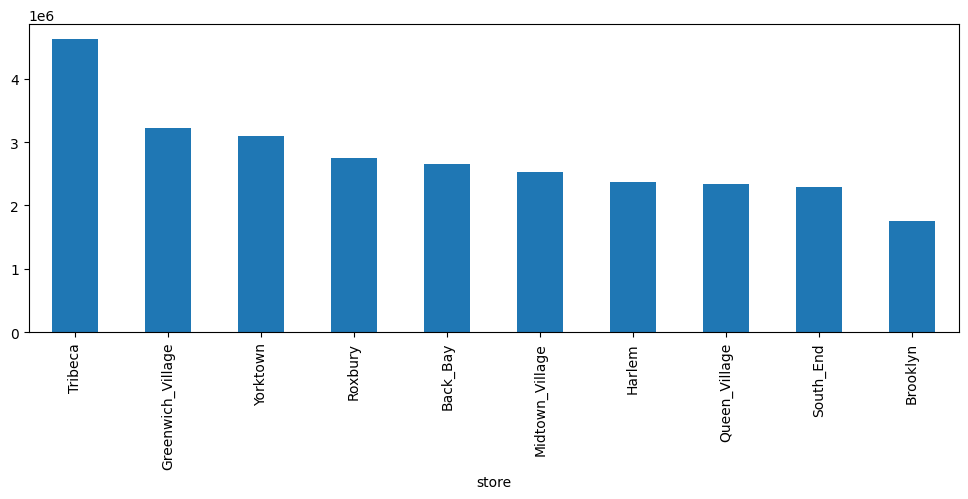

In [ ]:
(
    df.
    groupby(["store"])
    ["weekly_qty"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

<a id='eda_top_3_categories'></a>
### --> 3. EDA: Top 3 Categories
[Volver al índice](#index)<br>

<ipython-input-49-caf4b6007ed3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["region"])


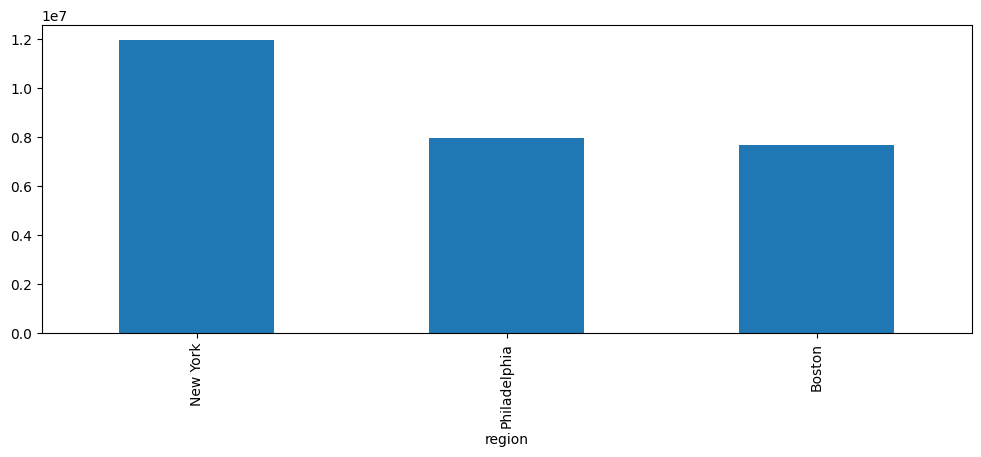

In [ ]:
(
    df.
    groupby(["region"])
    ["weekly_qty"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

<a id='build_ts_features'></a>
### Build Time Series Features (**CORE IDEA**)
[Volver al índice](#index)<br>

Since we are going to have to iterate over our dataset many times, we are interested in having all the code encapsulated in functions for reuse.

One of the key sections will be the generation of variables.

As we have seen before, our dataset contains more than 3049 Time Series.

Some of these Time Series can be grouped to extract new information.

For example, we can build variables like this:

1. Total sales by ITEM_ID (the lowest possible granularity).
2. Total sales by ITEM_CATEGORY_ID and SHOP_ID (a granularity greater than 1).
3. Total sales by SHOP_ID (a higher granularity).
4. And all the combinations we want in between.

In [ ]:
def build_ts_vars(df, gb_list, target_column, agg_func, agg_func_name ,lag=1):

    assert "date" in df.columns.tolist(), "Date must be in df columns"

    new_name = "_".join(gb_list + [target_column] + [agg_func_name])

    gb_df_ = (
        df
        .set_index("date")
        .groupby(gb_list)
        .resample("M")[target_column]
        .apply(agg_func)
        .to_frame()
        .reset_index()
        .rename(
            columns = {
                target_column : new_name
            }
        )
    )
    for n in range(1,lag+1):
        gb_df_[f"{new_name}_lag{n+1}"] = gb_df_.groupby(gb_list)[new_name].transform(
            lambda series: series.shift(1)
        )
    print(f"Dropping columns that might cause target leakage {new_name}")
    gb_df_.drop(new_name, inplace = True, axis = 1)

    return gb_df_

In [ ]:
GB_LIST = ["item"]
TARGET_COLUMN = "weekly_qty"
AGG_FUNC = np.sum
AGG_FUNC_NAME = "sum"
LAG=2
vars_item_ = build_ts_vars(
    df = df,
    gb_list = GB_LIST,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME,
    lag=LAG

)

vars_item_.head(10)

<ipython-input-50-d32121e75271>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(gb_list)
<ipython-input-50-d32121e75271>:12: FutureWarning: The provided callable <function sum at 0x7bbe27cc3370> is currently using DatetimeIndexResamplerGroupby.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .apply(agg_func)
<ipython-input-50-d32121e75271>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_df_[f"{new_name}_lag{n+1}"] = gb_df_.groupby(gb_list)[new_name].transform(
<ipython-input-50-d32121e75271>:22: FutureWar

Dropping columns that might cause target leakage item_weekly_qty_sum


,item,date,item_weekly_qty_sum_lag2,item_weekly_qty_sum_lag3
0,ACCESORIES_1_001,2014-04-30,NaN,NaN
1,ACCESORIES_1_001,2014-05-31,18.0,18.0
2,ACCESORIES_1_001,2014-06-30,82.0,82.0
3,ACCESORIES_1_001,2014-07-31,122.0,122.0
4,ACCESORIES_1_001,2014-08-31,126.0,126.0
5,ACCESORIES_1_001,2014-09-30,84.0,84.0
6,ACCESORIES_1_001,2014-10-31,100.0,100.0
7,ACCESORIES_1_001,2014-11-30,102.0,102.0
8,ACCESORIES_1_001,2014-12-31,105.0,105.0
9,ACCESORIES_1_001,2015-01-31,140.0,140.0


<a id='join_ts_features'></a>
### Join TS Features
[Volver al índice](#index)<br>

In this section, we merge the full_df with the auxiliary variables.

We must control the merge very well, so as not to cause a Cartesian error.

In [ ]:
df

,region,store,department,category,item,weekly_qty,average_price,date,sales,week
2935203,Boston,South_End,ACCESORIES_1,ACCESORIES,ACCESORIES_1_001,2,10.9858,2014-04-28,21.9716,18
2935204,Boston,Roxbury,ACCESORIES_1,ACCESORIES,ACCESORIES_1_001,2,10.9858,2014-04-28,21.9716,18
2935205,Boston,Back_Bay,ACCESORIES_1,ACCESORIES,ACCESORIES_1_001,3,11.1454,2014-04-28,33.4362,18
2935206,New York,Greenwich_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_001,1,10.9858,2014-04-28,10.9858,18
2935207,New York,Harlem,ACCESORIES_1,ACCESORIES,ACCESORIES_1_001,3,10.9858,2014-04-28,32.9574,18
...,...,...,...,...,...,...,...,...,...,...
5579925,New York,Harlem,SUPERMARKET_3,SUPERMARKET,SUPERMARKET_3_827,20,1.2000,2016-04-25,24.0000,17
5579926,New York,Tribeca,SUPERMARKET_3,SUPERMARKET,SUPERMARKET_3_827,32,1.2000,2016-04-25,38.4000,17
5579927,New York,Brooklyn,SUPERMARKET_3,SUPERMARKET,SUPERMARKET_3_827,22,1.2000,2016-04-25,26.4000,17
5579928,Philadelphia,Midtown_Village,SUPERMARKET_3,SUPERMARKET,SUPERMARKET_3_827,14,1.2000,2016-04-25,16.8000,17


In [ ]:
print(df.shape)

df = pd.merge(df, vars_item_, on = ["date"] + ["item"], how = "left")


print(df.shape)

(2644727, 10)
(2644727, 12)


We reuse the creation of new variables from the Clustering part to obtain more features for our model

In [ ]:
def aggregate_sales(df):
    df_aggregated = df.groupby(['item','category','department','region']).agg(
        totalSales = ('sales', np.sum),
        MaxSales = ('sales', np.max),
        MinSales = ('sales', np.min),
        avgSellPrice = ('sales', np.mean),
        totalQtySold = ('weekly_qty', np.sum),
        avgQtySold = ('weekly_qty', np.mean),
        maxQtySold = ('weekly_qty', np.max),
        minQtySold = ('weekly_qty', np.min),
        MaxPrice = ('average_price', np.max),
        MinPrice = ('average_price', np.min),
        avgPrice = ('average_price', np.mean),
        medianSales = ('sales', np.median),
        medianQtySold = ('weekly_qty', np.median),
        rangeSales = ('sales', lambda x: np.max(x) - np.min(x)),
        rangeQtySold = ('weekly_qty', lambda x: np.max(x) - np.min(x)),
        priceRange = ('average_price', lambda x: np.max(x) - np.min(x)),
    ).reset_index()
    # Realizar el merge con el DataFrame original
    df_merged = pd.merge(df, df_aggregated, on=['item', 'category', 'department', 'region'], how='left')
    return df_merged

In [ ]:
df = aggregate_sales(df)

<ipython-input-58-34af9d67066d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aggregated = df.groupby(['item','category','department','region']).agg(
<ipython-input-58-34af9d67066d>:2: FutureWarning: The provided callable <function sum at 0x7bbe27cc3370> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_aggregated = df.groupby(['item','category','department','region']).agg(
<ipython-input-58-34af9d67066d>:2: FutureWarning: The provided callable <function max at 0x7bbe27cc39a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_aggregated = df.grou

In [ ]:
df

,region,store,department,category,item,weekly_qty,average_price,date,sales,week,...,maxQtySold,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange
0,Boston,South_End,ACCESORIES_1,ACCESORIES,ACCESORIES_1_001,2,10.9858,2014-04-28,21.9716,18,...,9.0,1.0,11.1454,6.6500,10.978313,21.9716,2.0,87.8864,8.0,4.4954
1,Boston,Roxbury,ACCESORIES_1,ACCESORIES,ACCESORIES_1_001,2,10.9858,2014-04-28,21.9716,18,...,9.0,1.0,11.1454,6.6500,10.978313,21.9716,2.0,87.8864,8.0,4.4954
2,Boston,Back_Bay,ACCESORIES_1,ACCESORIES,ACCESORIES_1_001,3,11.1454,2014-04-28,33.4362,18,...,9.0,1.0,11.1454,6.6500,10.978313,21.9716,2.0,87.8864,8.0,4.4954
3,New York,Greenwich_Village,ACCESORIES_1,ACCESORIES,ACCESORIES_1_001,1,10.9858,2014-04-28,10.9858,18,...,14.0,1.0,11.1454,10.9858,10.990123,43.9432,4.0,142.8154,13.0,0.1596
4,New York,Harlem,ACCESORIES_1,ACCESORIES,ACCESORIES_1_001,3,10.9858,2014-04-28,32.9574,18,...,14.0,1.0,11.1454,10.9858,10.990123,43.9432,4.0,142.8154,13.0,0.1596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644722,New York,Harlem,SUPERMARKET_3,SUPERMARKET,SUPERMARKET_3_827,20,1.2000,2016-04-25,24.0000,17,...,181.0,1.0,1.2000,1.2000,1.200000,19.2000,16.0,216.0000,180.0,0.0000
2644723,New York,Tribeca,SUPERMARKET_3,SUPERMARKET,SUPERMARKET_3_827,32,1.2000,2016-04-25,38.4000,17,...,181.0,1.0,1.2000,1.2000,1.200000,19.2000,16.0,216.0000,180.0,0.0000
2644724,New York,Brooklyn,SUPERMARKET_3,SUPERMARKET,SUPERMARKET_3_827,22,1.2000,2016-04-25,26.4000,17,...,181.0,1.0,1.2000,1.2000,1.200000,19.2000,16.0,216.0000,180.0,0.0000
2644725,Philadelphia,Midtown_Village,SUPERMARKET_3,SUPERMARKET,SUPERMARKET_3_827,14,1.2000,2016-04-25,16.8000,17,...,49.0,1.0,1.2000,1.2000,1.200000,15.6000,13.0,57.6000,48.0,0.0000


<a id='train_test_split'></a>
### Train Test Split
[Volver al índice](#index)<br>

In [ ]:
df.columns.tolist()

['region',
 'store',
 'department',
 'category',
 'item',
 'weekly_qty',
 'average_price',
 'date',
 'sales',
 'week',
 'item_weekly_qty_sum_lag2',
 'item_weekly_qty_sum_lag3',
 'totalSales',
 'MaxSales',
 'MinSales',
 'avgSellPrice',
 'totalQtySold',
 'avgQtySold',
 'maxQtySold',
 'minQtySold',
 'MaxPrice',
 'MinPrice',
 'avgPrice',
 'medianSales',
 'medianQtySold',
 'rangeSales',
 'rangeQtySold',
 'priceRange']

In [ ]:
COLUMNS_TO_DROP = ['department']

df.drop(COLUMNS_TO_DROP, inplace = True, axis = 1)

In [ ]:
df.columns.tolist()

['region',
 'store',
 'category',
 'item',
 'weekly_qty',
 'average_price',
 'date',
 'sales',
 'week',
 'item_weekly_qty_sum_lag2',
 'item_weekly_qty_sum_lag3',
 'totalSales',
 'MaxSales',
 'MinSales',
 'avgSellPrice',
 'totalQtySold',
 'avgQtySold',
 'maxQtySold',
 'minQtySold',
 'MaxPrice',
 'MinPrice',
 'avgPrice',
 'medianSales',
 'medianQtySold',
 'rangeSales',
 'rangeQtySold',
 'priceRange']

Creating the functions for (Training / Validating / Testing)

In [ ]:
train_index = sorted(list(df["date"].unique()))[:-2]

valida_index = [sorted(list(df["date"].unique()))[-2]]

test_index = [sorted(list(df["date"].unique()))[-1]]

In [ ]:
print(f"Our train index is {train_index[:2]} - ... - {train_index[-2:]}\n")
print(f"Our validation index is {valida_index}\n")
print(f"Our test/prediction index is {test_index}\n")

Our train index is [Timestamp('2014-04-28 00:00:00'), Timestamp('2014-05-05 00:00:00')] - ... - [Timestamp('2016-04-04 00:00:00'), Timestamp('2016-04-11 00:00:00')]

Our validation index is [Timestamp('2016-04-18 00:00:00')]

Our test/prediction index is [Timestamp('2016-04-25 00:00:00')]



We create a function to generate Test / Validation / Training variables to divide the dataset

In [ ]:
def aggregate_sales(df):
    # Asegurarse de que la columna de fecha esté en formato datetime
    df['date'] = pd.to_datetime(df['date'])

    # Obtener las fechas únicas y ordenarlas
    unique_dates = sorted(df['date'].unique())

    # Dividir las fechas en índices de entrenamiento, validación, prueba y predicción
    train_index = unique_dates[:-3]
    valida_index = [unique_dates[-3]]
    test_index = [unique_dates[-2]]
    pred_index = [unique_dates[-1] + pd.DateOffset(weeks=i) for i in range(1, 5)]

    # Crear los conjuntos de datos de entrenamiento, validación, prueba y predicción
    X_train = df[df["date"].isin(train_index)].drop(['weekly_qty', "date"], axis=1)
    Y_train = df[df["date"].isin(train_index)]['weekly_qty']

    X_valida = df[df["date"].isin(valida_index)].drop(['weekly_qty', "date"], axis=1)
    Y_valida = df[df["date"].isin(valida_index)]['weekly_qty']

    X_test = df[df["date"].isin(test_index)].drop(['weekly_qty', "date"], axis=1)
    Y_test = df[df["date"].isin(test_index)]['weekly_qty']

    # Crear un DataFrame vacío para las próximas 4 semanas
    X_pred = pd.DataFrame({'date': pred_index})

    return X_train, Y_train, X_valida, Y_valida, X_test, Y_test, X_pred

In [ ]:
X_train, Y_train, X_valida, Y_valida, X_test, Y_test, X_pred= aggregate_sales(df)

# Training Model

In [ ]:

# Crear el modelo con enable_categorical=True
model = xgb.XGBRegressor(eval_metric="rmse", seed=175, early_stopping_rounds=20,enable_categorical=True)
# Ajustar el modelo
model.fit(
    X_train,
    Y_train,
    eval_set=[(X_train, Y_train), (X_valida, Y_valida)],
    verbose=True,
    # early_stopping_rounds=10
)

[0]	validation_0-rmse:16.60890	validation_1-rmse:18.51129
[1]	validation_0-rmse:12.44969	validation_1-rmse:13.91908
[2]	validation_0-rmse:9.55016	validation_1-rmse:10.74541
[3]	validation_0-rmse:7.50328	validation_1-rmse:8.46621
[4]	validation_0-rmse:6.14457	validation_1-rmse:6.92602
[5]	validation_0-rmse:5.25175	validation_1-rmse:5.96733
[6]	validation_0-rmse:4.68696	validation_1-rmse:5.28127
[7]	validation_0-rmse:4.33399	validation_1-rmse:4.87820
[8]	validation_0-rmse:4.11410	validation_1-rmse:4.58607
[9]	validation_0-rmse:3.95026	validation_1-rmse:4.39989
[10]	validation_0-rmse:3.83680	validation_1-rmse:4.30818
[11]	validation_0-rmse:3.76322	validation_1-rmse:4.28462
[12]	validation_0-rmse:3.69089	validation_1-rmse:4.24632
[13]	validation_0-rmse:3.65252	validation_1-rmse:4.22571
[14]	validation_0-rmse:3.61680	validation_1-rmse:4.21069
[15]	validation_0-rmse:3.59095	validation_1-rmse:4.16587
[16]	validation_0-rmse:3.57544	validation_1-rmse:4.16743
[17]	validation_0-rmse:3.55945	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=True, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Evaluation

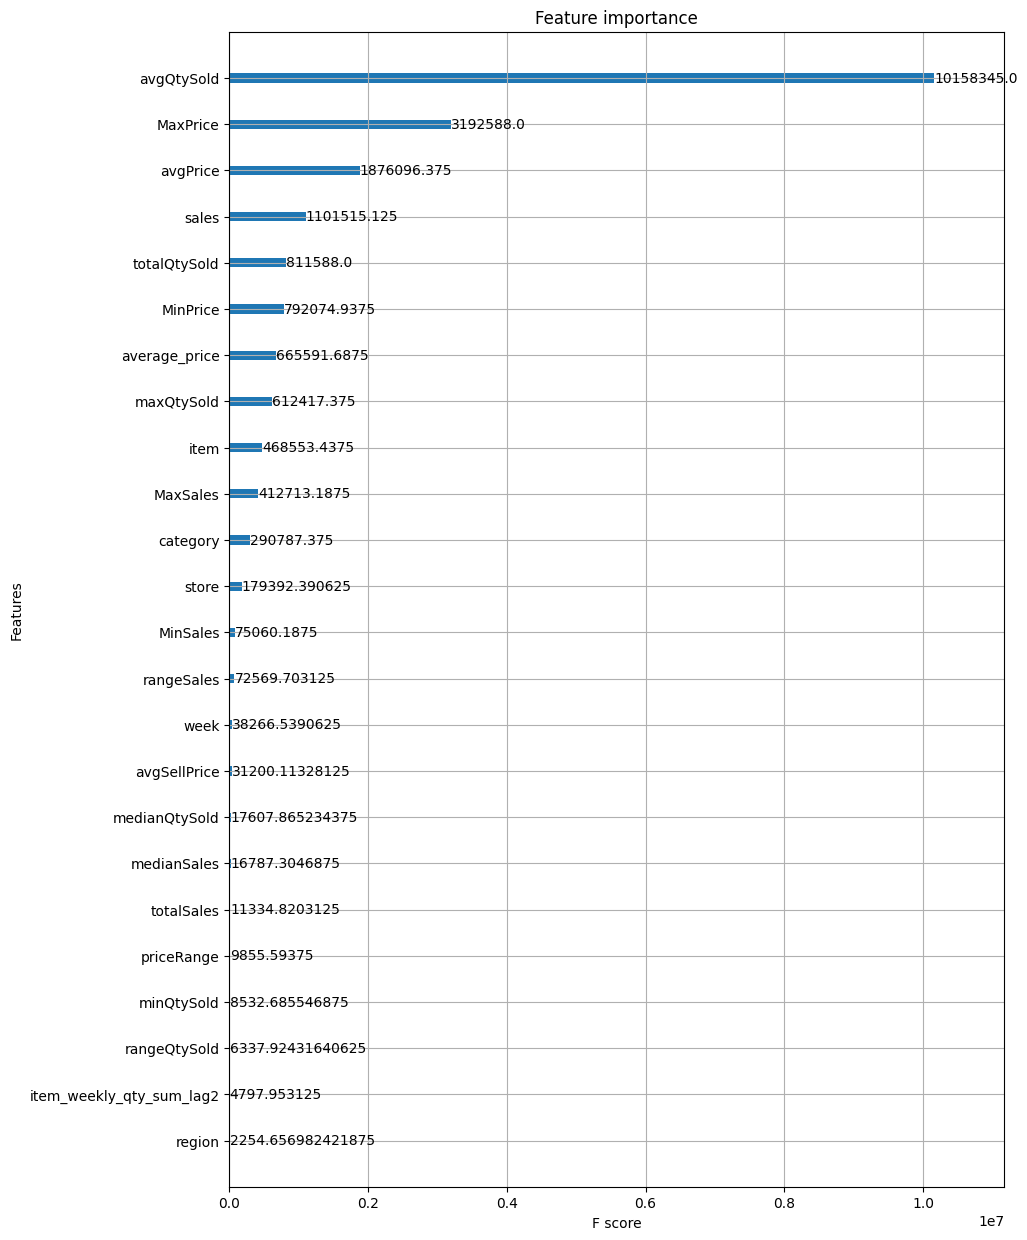

In [ ]:
fig, ax = plt.subplots(figsize = (10, 15))
xgb.plot_importance(model, importance_type = "gain", ax = ax);

# Prediction

In [ ]:
X_test.columns

Index(['region', 'store', 'category', 'item', 'average_price', 'sales', 'week',
       'item_weekly_qty_sum_lag2', 'item_weekly_qty_sum_lag3', 'totalSales',
       'MaxSales', 'MinSales', 'avgSellPrice', 'totalQtySold', 'avgQtySold',
       'maxQtySold', 'minQtySold', 'MaxPrice', 'MinPrice', 'avgPrice',
       'medianSales', 'medianQtySold', 'rangeSales', 'rangeQtySold',
       'priceRange'],
      dtype='object')

In [ ]:
if "weekly_qty" in X_test.columns:
    X_test.drop("weekly_qty", axis = 1, inplace = True)

In [ ]:
Y_test_predict = model.predict(X_test)
X_test["weekly_qty"] = Y_test_predict

In [ ]:
X_test.head()


,region,store,category,item,average_price,sales,week,item_weekly_qty_sum_lag2,item_weekly_qty_sum_lag3,totalSales,...,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,weekly_qty
931,Boston,South_End,ACCESORIES,ACCESORIES_1_001,10.9858,21.9716,16,NaN,NaN,8944.2500,...,1.0,11.1454,6.6500,10.978313,21.9716,2.0,87.8864,8.0,4.4954,1.793086
932,Boston,Back_Bay,ACCESORIES,ACCESORIES_1_001,10.9858,43.9432,16,NaN,NaN,8944.2500,...,1.0,11.1454,6.6500,10.978313,21.9716,2.0,87.8864,8.0,4.4954,3.917926
933,New York,Greenwich_Village,ACCESORIES,ACCESORIES_1_001,11.1454,66.8724,16,NaN,NaN,20521.3414,...,1.0,11.1454,10.9858,10.990123,43.9432,4.0,142.8154,13.0,0.1596,6.060857
934,New York,Harlem,ACCESORIES,ACCESORIES_1_001,11.1454,44.5816,16,NaN,NaN,20521.3414,...,1.0,11.1454,10.9858,10.990123,43.9432,4.0,142.8154,13.0,0.1596,3.871711
935,New York,Tribeca,ACCESORIES,ACCESORIES_1_001,11.1454,66.8724,16,NaN,NaN,20521.3414,...,1.0,11.1454,10.9858,10.990123,43.9432,4.0,142.8154,13.0,0.1596,6.060857


In [ ]:
X_test.reset_index(inplace = True)

Here we observe the validation of the model

In [ ]:
Y_train_predict = model.predict(X_train)
Y_valida_predict = model.predict(X_valida)

rmse_train = np.sqrt(
    mean_squared_error(
        y_true = Y_train,
        y_pred = Y_train_predict
    )
)

rmse_valida = np.sqrt(
    mean_squared_error(
        y_true = Y_valida,
        y_pred = Y_valida_predict
    )
)

rmse_train= str(round(rmse_train, 3)).replace(".", "_")
rmse_valida = str(round(rmse_valida, 3)).replace(".", "_")

# Results of the prediction

In [ ]:
print(f"Train RMSE: {rmse_train}")
print(f"Validation RMSE: {rmse_valida}")

Train RMSE: 3_42
Validation RMSE: 4_084


Plotting the results of Prediction vs Actual

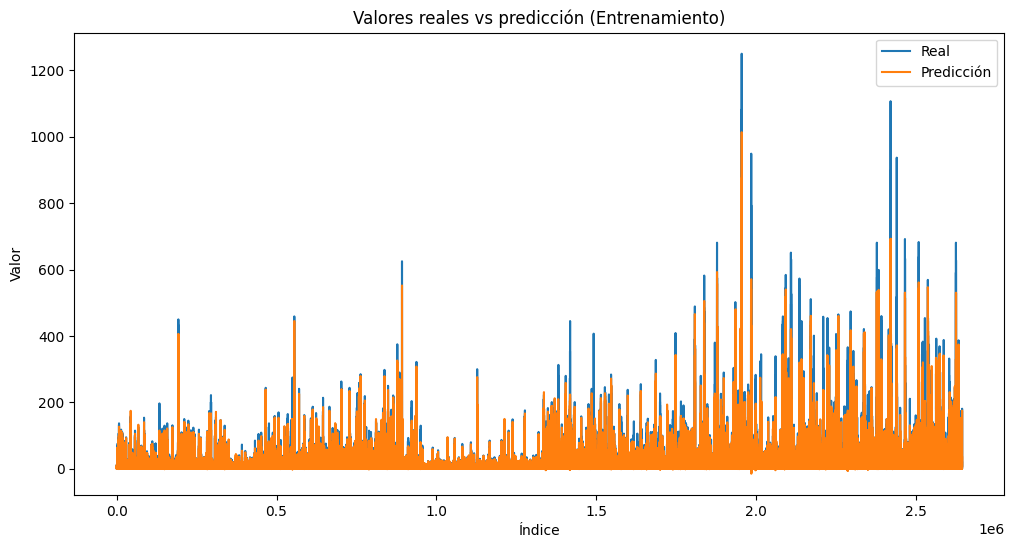

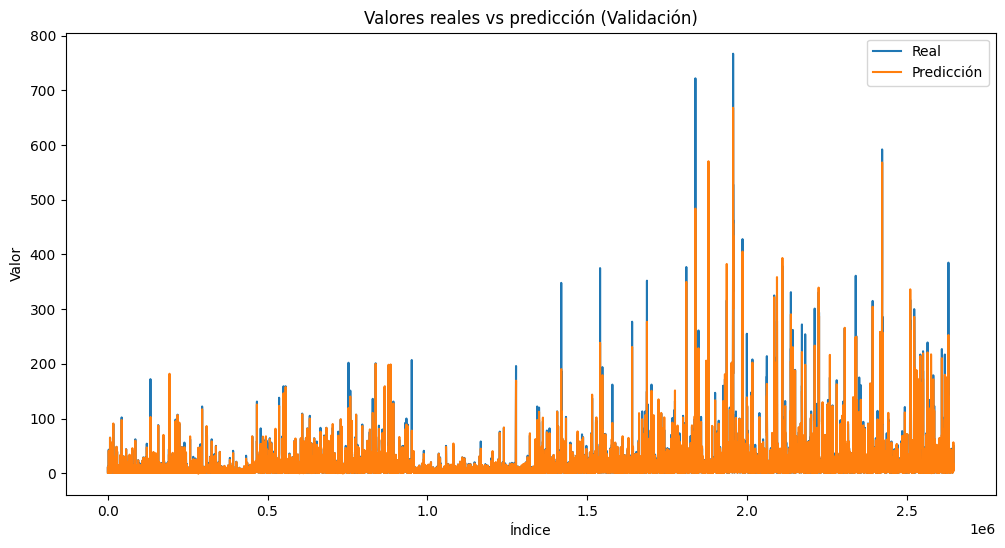

In [ ]:
# La primer gráfica los valores reales vs la predicción ( entrenamiento)

plt.figure(figsize=(12, 6))
plt.plot(Y_train.index, Y_train, label='Real')
plt.plot(Y_train.index, Y_train_predict, label='Predicción')
plt.title('Valores reales vs predicción (Entrenamiento)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

# La segunda gráfica los valores reales vs la predicción ( validación)

plt.figure(figsize=(12, 6))
plt.plot(Y_valida.index, Y_valida, label='Real')
plt.plot(Y_valida.index, Y_valida_predict, label='Predicción')
plt.title('Valores reales vs predicción (Validación)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['region', 'store', 'category', 'item', 'weekly_qty', 'average_price',
       'date', 'sales', 'week', 'item_weekly_qty_sum_lag2',
       'item_weekly_qty_sum_lag3', 'totalSales', 'MaxSales', 'MinSales',
       'avgSellPrice', 'totalQtySold', 'avgQtySold', 'maxQtySold',
       'minQtySold', 'MaxPrice', 'MinPrice', 'avgPrice', 'medianSales',
       'medianQtySold', 'rangeSales', 'rangeQtySold', 'priceRange'],
      dtype='object')

# We generate the new dataset with the PREDICTION of the next 4 weeks to Forecast

In [ ]:
# Suponiendo que 'df' es tu DataFrame
# Asegurarse de que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Obtener la última fecha del DataFrame
ultima_fecha = df['date'].max()

# Generar las fechas para las próximas 4 semanas
fechas_pred = [ultima_fecha + pd.DateOffset(weeks=i) for i in range(1, 5)]

# Crear un DataFrame vacío para las próximas 4 semanas
X_pred = pd.DataFrame({'date': fechas_pred})

# Obtener las combinaciones únicas de 'item', 'region', 'department' y 'category'
combinaciones_unicas = df[['region', 'store', 'category', 'item']].drop_duplicates()

# Repetir las combinaciones únicas para cada fecha de predicción
X_pred = pd.concat([X_pred.assign(**comb) for comb in combinaciones_unicas.to_dict('records')], ignore_index=True)

# Asegurarse de que X_pred contenga las mismas columnas que X_train, excluyendo 'weekly_qty' y 'date'
columnas_X_train = df.drop(columns=['weekly_qty']).columns
for col in columnas_X_train:
    if col not in X_pred.columns:
        X_pred[col] = np.nan
for col in X_pred.columns:
    if X_pred[col].dtype == 'object':
        X_pred[col] = X_pred[col].astype('category')
# # Convert 'object' columns to numerical representations
# for col in ['item', 'region', 'department', 'category']:
#     X_pred[col] = X_pred[col].astype('category').cat.codes
# Obtener las columnas en el orden correcto del modelo entrenado
column_order = model.get_booster().feature_names

# Reordenar las columnas de X_pred para que coincidan con el orden del modelo
X_pred = X_pred[column_order]

# Hacer predicciones utilizando el modelo entrenado
predicciones = model.predict(X_pred)

# Agregar las predicciones al DataFrame X_pred
X_pred['weekly_qty'] = predicciones

# Mostrar información del DataFrame resultante
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121912 entries, 0 to 121911
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   region                    121912 non-null  category
 1   store                     121912 non-null  category
 2   category                  121912 non-null  category
 3   item                      121912 non-null  category
 4   average_price             0 non-null       float64 
 5   sales                     0 non-null       float64 
 6   week                      0 non-null       float64 
 7   item_weekly_qty_sum_lag2  0 non-null       float64 
 8   item_weekly_qty_sum_lag3  0 non-null       float64 
 9   totalSales                0 non-null       float64 
 10  MaxSales                  0 non-null       float64 
 11  MinSales                  0 non-null       float64 
 12  avgSellPrice              0 non-null       float64 
 13  totalQtySold              0 n

In [ ]:
X_pred.head()

,region,store,category,item,average_price,sales,week,item_weekly_qty_sum_lag2,item_weekly_qty_sum_lag3,totalSales,...,minQtySold,MaxPrice,MinPrice,avgPrice,medianSales,medianQtySold,rangeSales,rangeQtySold,priceRange,weekly_qty
0,Boston,South_End,ACCESORIES,ACCESORIES_1_001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.827972
1,Boston,South_End,ACCESORIES,ACCESORIES_1_001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.827972
2,Boston,South_End,ACCESORIES,ACCESORIES_1_001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.827972
3,Boston,South_End,ACCESORIES,ACCESORIES_1_001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.827972
4,Boston,Roxbury,ACCESORIES,ACCESORIES_1_001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.541550


# Final Dataset

In [ ]:
(
    X_test[['region', 'store', 'category', 'item','weekly_qty']]
    .to_csv(f"/content/drive/MyDrive/Nuclio_master/TFM/CSV/submission_train_{rmse_train}_valida_{rmse_valida}.csv", index = False)
)

In [ ]:
# FILE_NAME = "/content/drive/MyDrive/Nuclio_master/TFM/CSV/df_s_c_p_V1_1.csv"
